# **Neural Network Model for the Fashion MNIST Dataset**

In this notebook, we will implement a neural network model to recognize different fashion products in the Fashion MNIST dataset

\
**Instruction: type your code when you see 'Type your code here' in comments**

In [1]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print('Tensorflow version:',tf.__version__)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns
plt.style.use('seaborn')

import os
print('Keras version:', tf.keras.__version__)

Num GPUs Available:  0
Tensorflow version: 2.9.1
Keras version: 2.9.0


# Loading the Fashion MNIST Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(f'Shape of an image: {x_train[0].shape}')
print(f'Max pixel value: {x_train.max()}')
print(f'Min pixel value: {x_train.min()}')
print(f'Classes: {np.unique(y_train)}')

Shape of an image: (28, 28)
Max pixel value: 255
Min pixel value: 0
Classes: [0 1 2 3 4 5 6 7 8 9]


In [4]:
# Creating a list of labels

fashion_mnist_labels = ["T-shirt/top", 
             "Trouser",
             "Pullover",
             "Dress",
             "Coat",
             "Sandal", 
             "Shirt",
             "Sneaker",
             "Bag",
             "Ankle boot"]

# Plotting some of the images

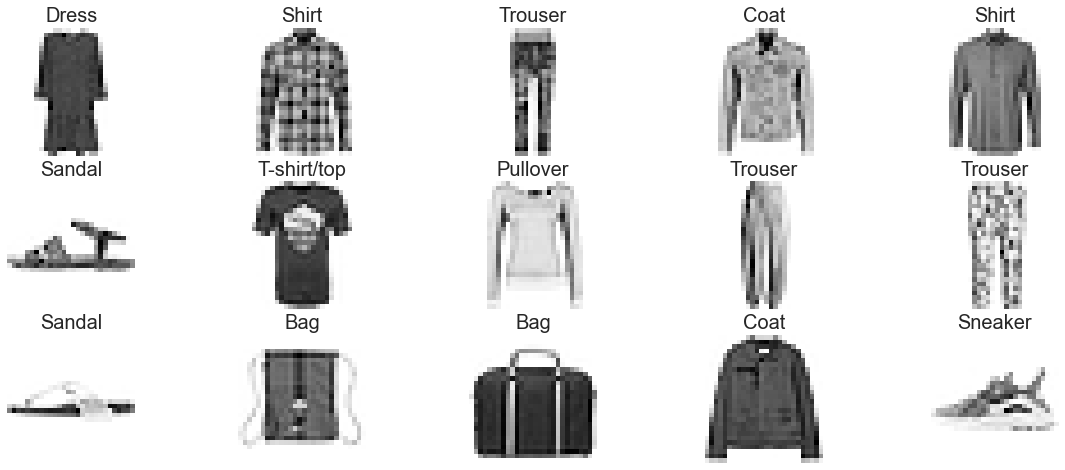

In [5]:
figure = plt.figure(figsize=(20,8))

indices = np.random.choice(np.arange(x_train.shape[0]), 15, replace=False)
subset = x_train[indices]

for i, image_sample in enumerate(subset):
  ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  j = fashion_mnist_labels[y_train[indices[i]]] #image label
  ax.set_title(j, fontsize=20)
  ax.imshow(image_sample.reshape(28,28))
  i+=1

# Count plot of the training set


<AxesSubplot:xlabel='label', ylabel='count'>

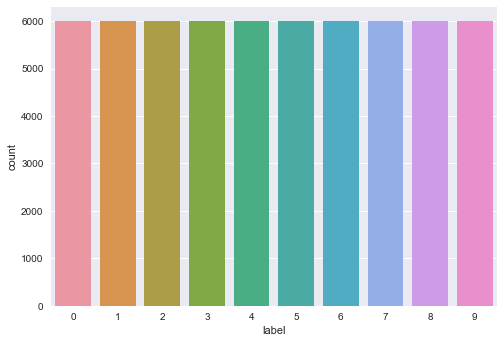

In [6]:
y_train_pd = pd.DataFrame(y_train, columns=['label'])
sns.countplot(x='label', data=y_train_pd)

# Count plot of the testing set


<AxesSubplot:xlabel='label', ylabel='count'>

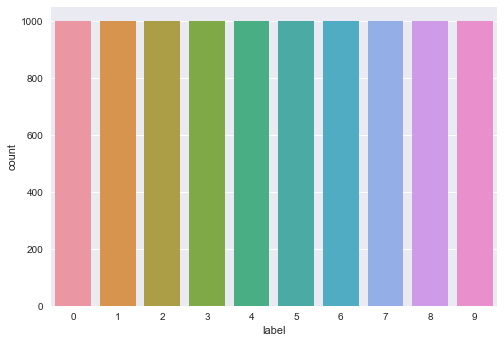

In [7]:
y_test_pd = pd.DataFrame(y_test, columns=['label'])
sns.countplot(x='label', data=y_test_pd)

In [8]:
#Type your code here

x_train =  x_train/255  #feature scaling (Hint:255 is the maximum pixel value)
x_test =  x_test/255

num_classes = 10 #no. of classes

train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)#one hot encoding for the training set
test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)  #one hot encdoing for the testing set

print(y_train[0])
print(train_one_hot[0])


train_size = x_train.shape[0]
test_size = x_test.shape[0]


print(f'Max pixel value: {x_train.max()}')
print(f'Min pixel value: {x_train.min()}')
print(f'Train size: {train_size}, Test size: {test_size}')
print(f'Train data shape: {x_train.shape}, Test data shape: {x_test.shape}')
print(f'Train label shape: {train_one_hot.shape}, Test label shape: {test_one_hot.shape}')


9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Max pixel value: 1.0
Min pixel value: 0.0
Train size: 60000, Test size: 10000
Train data shape: (60000, 28, 28), Test data shape: (10000, 28, 28)
Train label shape: (60000, 10), Test label shape: (10000, 10)


## Task: In this section, we are going to define our neural network model

Implement a neural network according to the below figure, it consists of:

1.   **an input layer**
> Shape = INPUT_SHAPE
2.   **a dense layer**
> No. of hidden units = 100, Activation = 'relu'
3.   **an output (dense) layer**
> Activation = 'softmax'


![](https://drive.google.com/uc?export=view&id=1k41hOCQY7QWB270IJ0VXo1cdMpZb6hmy)


**Links to the documentation for your reference:**

Input layer:
https://www.tensorflow.org/api_docs/python/tf/keras/Input

Dense layer:
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense









# **Model training**

### Softmax function



At the output layer, the softmax function is used to normalize the output scores into probabilities:


$$p_i = softmax(x_i) = \frac{\exp({y_i})}{ \sum_{j=1}^n \exp({y_j})}$$

After applying the softmax function, the sum of the output probabilities will be 1:
 $$\sum_{i=1}^n p_i = 1$$




In [9]:
#Type your code here

# Reshaping the data
INPUT_SHAPE = [28*28]  #input shape for one image

x_train = x_train.reshape([-1]+INPUT_SHAPE)
x_test = x_test.reshape([-1]+INPUT_SHAPE)

print(f'Train data shape: {x_train.shape}, Test data shape: {x_test.shape}')

Train data shape: (60000, 784), Test data shape: (10000, 784)


In [10]:
from tensorflow.keras.layers import *


tf.keras.backend.clear_session()

#Type your code here

#Define and compile your model
#=============================================
inputs = tf.keras.Input(shape=INPUT_SHAPE)
x = Dense(units = 100, activation = 'relu')(inputs)
output = Dense(units = num_classes, activation='softmax')(x)



model = tf.keras.Model(inputs = inputs, outputs = output, name = 'dnn_mnist_model')


model.compile()


#=============================================
model.summary()

Model: "dnn_mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


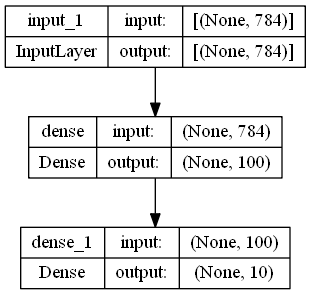

In [11]:
import pydot
import graphviz
tf.keras.utils.plot_model(model, "dnn_model.png", show_shapes=True)

## Defining callback functions and training the model

In [12]:

from tensorflow.keras.callbacks import EarlyStopping

#Type your code here
batch_size = 
epochs = 

#Early Stopping callback function





# Starting the training
history =  #calling model.fit()




SyntaxError: invalid syntax (Temp/ipykernel_10460/1048736733.py, line 4)

# **Plotting the learning curves**

In [ ]:
res = pd.DataFrame(history.history)
res[['loss','val_loss']].plot()

In [ ]:
res[['accuracy','val_accuracy']].plot()

# **Model evaluation on the testing set**

In [ ]:
#Type your code here

scores =    #calling model.evaluate()
names = model.metrics_names

for i in range(len(scores)):
  print(f'{names[i]}: {scores[i]:.4f}')

# Making predictions and plotting the result

In [ ]:
#Type your code here

prediction =  #calling model.predict() here


print(
    f'sum: {np.sum(prediction, axis=1)}\n'
    f'predict index: {np.argmax(prediction, axis=1)}'
)

In [ ]:
figure = plt.figure(figsize=(20,8))

for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
   
    ax.imshow(x_test[index].reshape(28,28), cmap='gray')
    predict_index = np.argmax(prediction[index])
    true_index = np.argmax(test_one_hot[index])
   
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                fashion_mnist_labels[true_index]),
                color=("green" if predict_index == true_index else "red"))